In [1]:
import pandas as pd
import numpy as np


%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


In [2]:
DataFrame = pd.read_csv('/content/heart_2020_cleaned.csv')
DataFrame.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [3]:
DataFrame.describe().T.style.set_properties(**{'background-color': 'grey','color': 'white','border-color': 'white'})

,count,mean,std,min,25%,50%,75%,max
BMI,319795.000000,28.325399,6.356100,12.020000,24.030000,27.340000,31.420000,94.850000
PhysicalHealth,319795.000000,3.371710,7.950850,0.000000,0.000000,0.000000,2.000000,30.000000
MentalHealth,319795.000000,3.898366,7.955235,0.000000,0.000000,0.000000,3.000000,30.000000
SleepTime,319795.000000,7.097075,1.436007,1.000000,6.000000,7.000000,8.000000,24.000000


In [4]:
DataFrame.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [5]:
DataFrame.nunique()

HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

In [6]:
DataFrame =  DataFrame[DataFrame.columns].replace({'Yes':1, 'No':0, 'Male':1,'Female':0,'No, borderline diabetes':'0','Yes (during pregnancy)':'1' })
DataFrame['Diabetic'] = DataFrame['Diabetic'].astype(int)

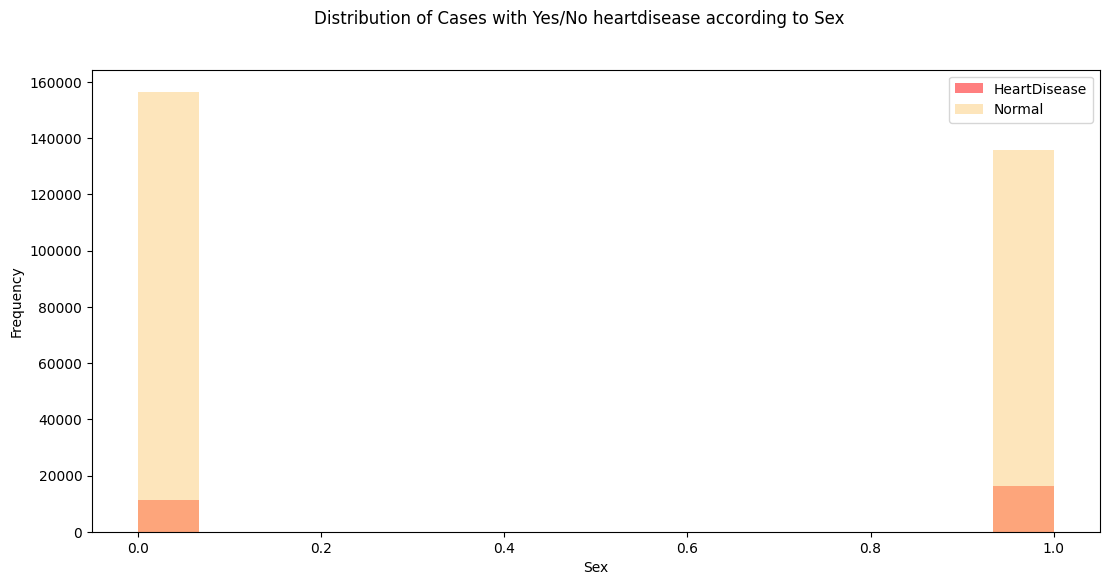

In [7]:

fig, ax = plt.subplots(figsize = (13,6))

ax.hist(DataFrame[DataFrame["HeartDisease"]==1]["Sex"], bins=15, alpha=0.5, color="red", label="HeartDisease")
ax.hist(DataFrame[DataFrame["HeartDisease"]==0]["Sex"], bins=15, alpha=0.5, color="#fccc79", label="Normal")

ax.set_xlabel("Sex")
ax.set_ylabel("Frequency")

fig.suptitle("Distribution of Cases with Yes/No heartdisease according to Sex")

ax.legend();

Text(0.5, 0.98, 'Distribution of Cases with Yes/No heartdisease according to being a smoker or not.')

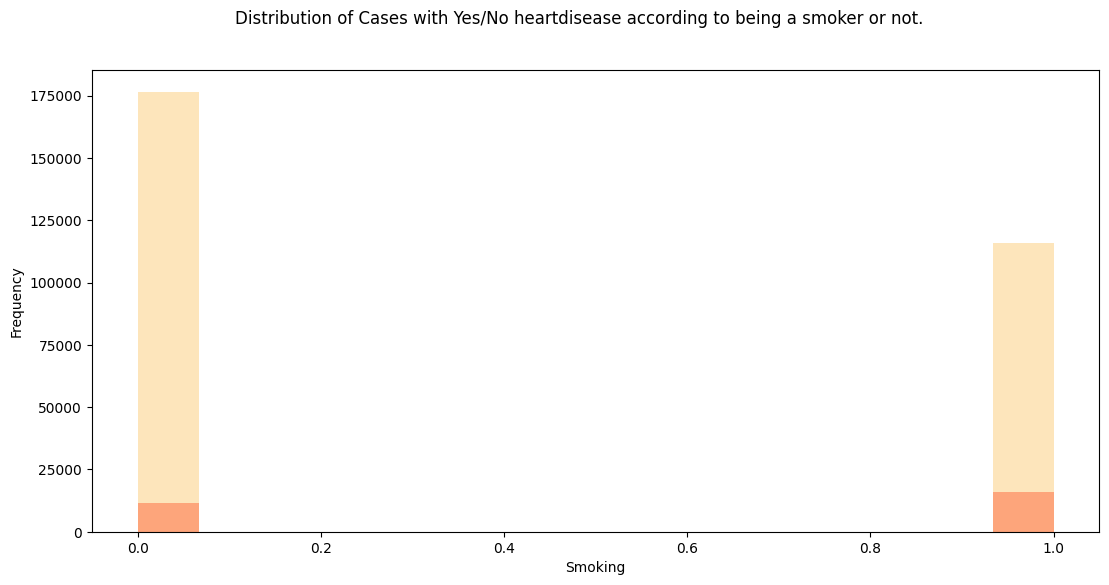

In [8]:
fig, ax = plt.subplots(figsize = (13,6))

ax.hist(DataFrame[DataFrame["HeartDisease"]==1]["Smoking"], bins=15, alpha=0.5, color="red", label="HeartDisease")
ax.hist(DataFrame[DataFrame["HeartDisease"]==0]["Smoking"], bins=15, alpha=0.5, color="#fccc79", label="Normal")

ax.set_xlabel("Smoking")
ax.set_ylabel("Frequency")

fig.suptitle("Distribution of Cases with Yes/No heartdisease according to being a smoker or not.")


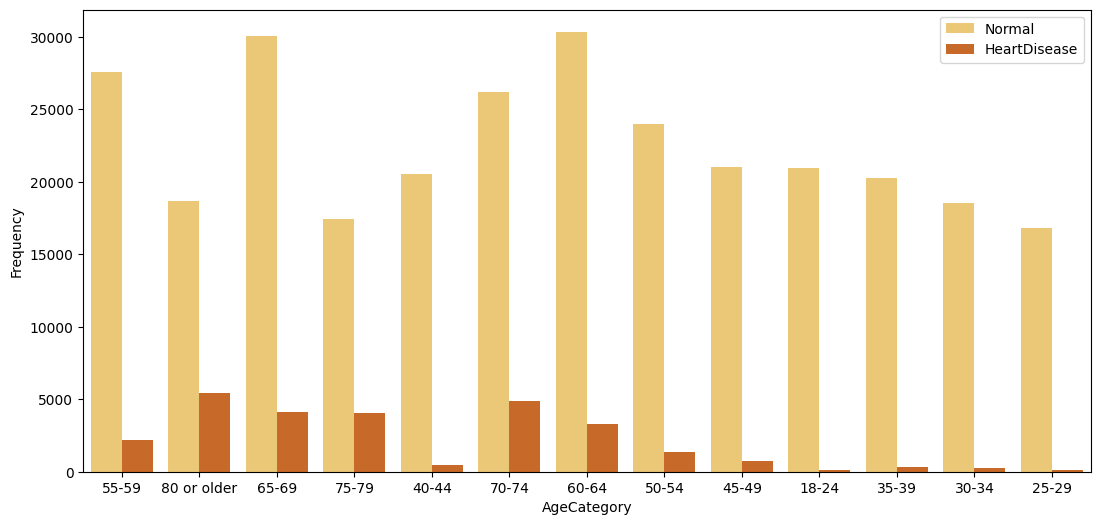

In [9]:
plt.figure(figsize = (13,6))
sns.countplot(x = DataFrame['AgeCategory'], hue = 'HeartDisease', data = DataFrame, palette = 'YlOrBr')
fig.suptitle("Distribution of Cases with Yes/No hartdisease according to AgeCategory")
plt.xlabel('AgeCategory')
plt.legend(['Normal','HeartDisease'])
plt.ylabel('Frequency')
plt.show()

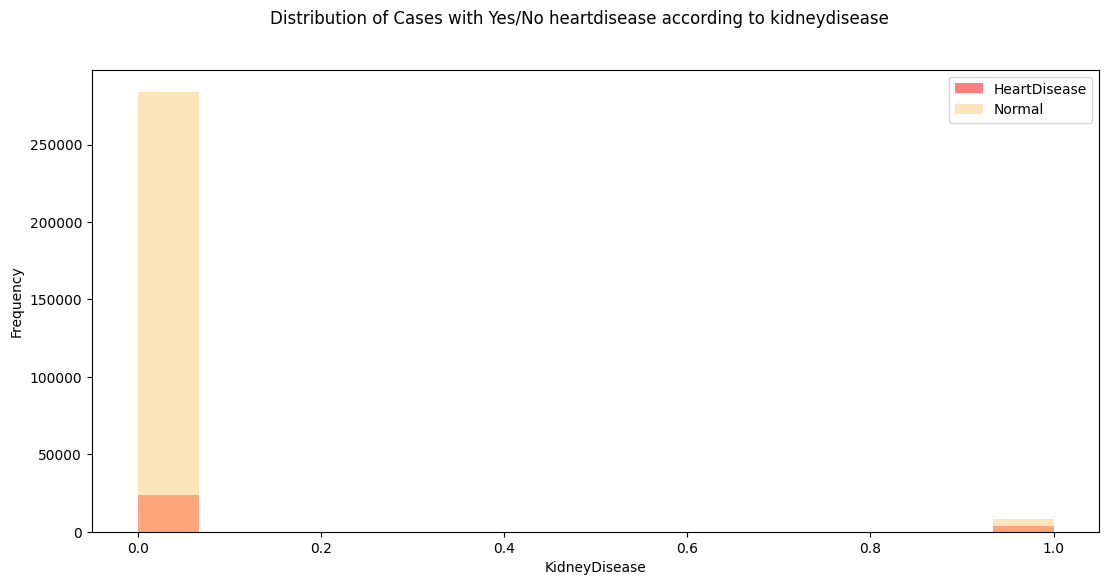

In [10]:
fig, ax = plt.subplots(figsize = (13,6))

ax.hist(DataFrame[DataFrame["HeartDisease"]==1]["KidneyDisease"], bins=15, alpha=0.5, color="red", label="HeartDisease")
ax.hist(DataFrame[DataFrame["HeartDisease"]==0]["KidneyDisease"], bins=15, alpha=0.5, color="#fccc79", label="Normal")

ax.set_xlabel("KidneyDisease")
ax.set_ylabel("Frequency")

fig.suptitle("Distribution of Cases with Yes/No heartdisease according to kidneydisease")

ax.legend();

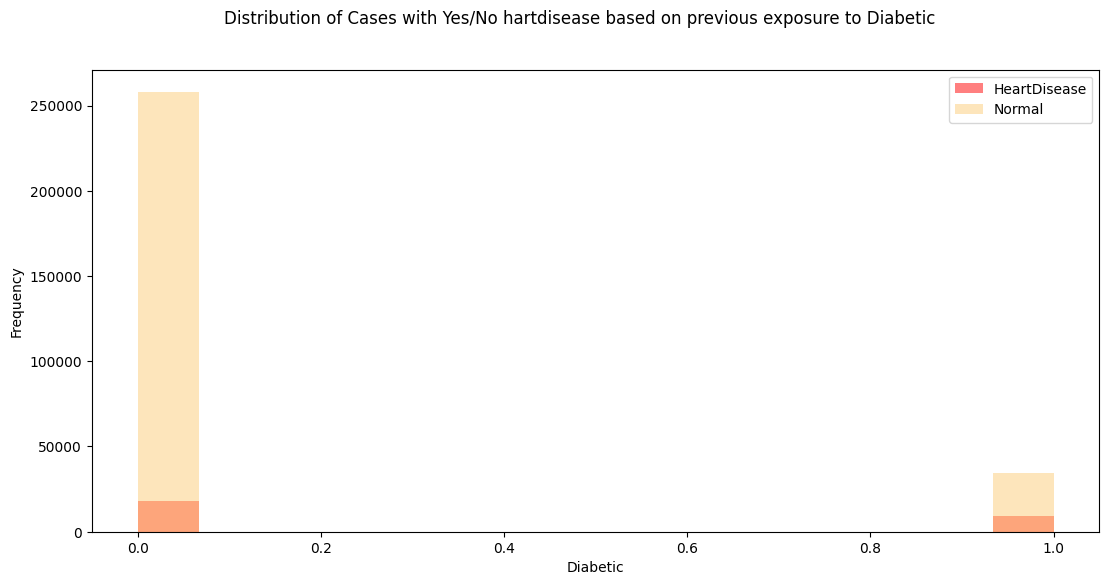

In [11]:
fig, ax = plt.subplots(figsize = (13,6))

ax.hist(DataFrame[DataFrame["HeartDisease"]==1]["Diabetic"], bins=15, alpha=0.5, color="red", label="HeartDisease")
ax.hist(DataFrame[DataFrame["HeartDisease"]==0]["Diabetic"], bins=15, alpha=0.5, color="#fccc79", label="Normal")

ax.set_xlabel("Diabetic")
ax.set_ylabel("Frequency")

fig.suptitle("Distribution of Cases with Yes/No hartdisease based on previous exposure to Diabetic")

ax.legend();

<ipython-input-13-37dd55c727e8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = DataFrame.corr().round(2)


<Axes: >

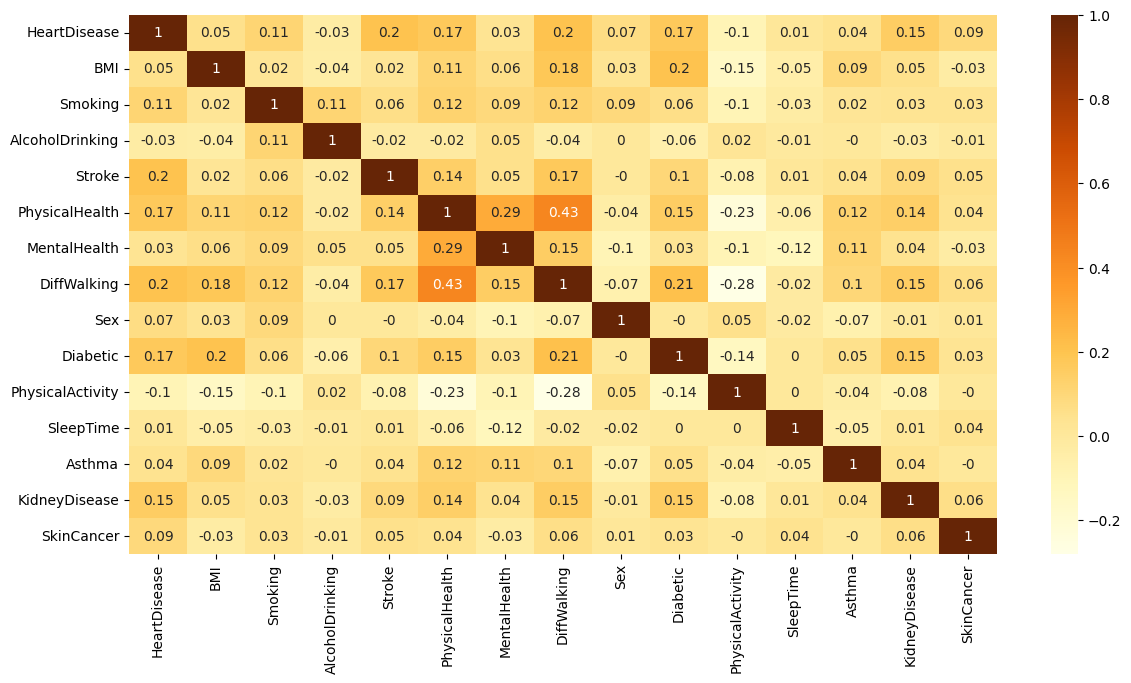

In [13]:
correlation = DataFrame.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'YlOrBr')

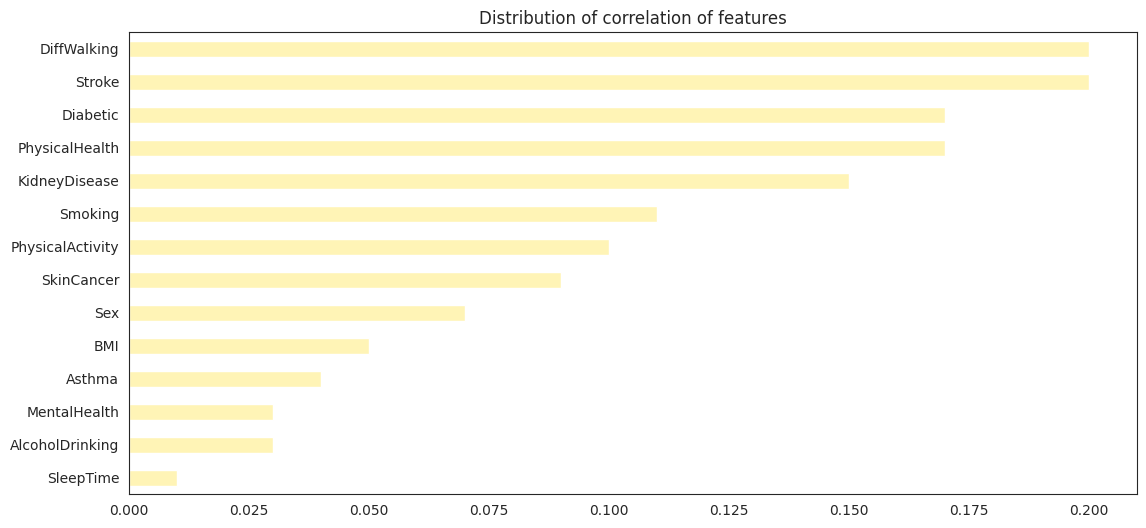

In [24]:
sns.set_style('white')
sns.set_palette('YlOrBr')
plt.figure(figsize = (13,6))
plt.title('Distribution of correlation of features')
abs(correlation['HeartDisease']).sort_values()[:-1].plot.barh()
plt.show()

In [14]:
#Select Features
features = DataFrame.drop(columns =['HeartDisease'], axis = 1)

#Select Target
target = DataFrame['HeartDisease']

# Set Training and Testing Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, shuffle = True, test_size = 0.2, random_state = 44)


print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (255836, 17)
Shape of testing feature: (63959, 17)
Shape of training label: (255836,)
Shape of training label: (63959,)


In [15]:
# Create a ColumnTransformer encoding
transformer = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse=False), ['AgeCategory', 'Race', 'GenHealth'])
    ],
    remainder='passthrough'
)

# Encode training data
transformed_train = transformer.fit_transform(X_train)
transformed_train_data = pd.DataFrame(transformed_train, columns=transformer.get_feature_names_out())

# Concat the two tables
transformed_train_data.reset_index(drop=True, inplace=True)
X_train.reset_index(drop=True, inplace=True)
X_train = pd.concat([transformed_train_data, X_train], axis=1)

# Remove old columns
X_train.drop(['AgeCategory', 'Race', 'GenHealth'], axis=1, inplace=True)

# Encode test data
transformed_test = transformer.transform(X_test)  # Use transform, not fit_transform
transformed_test_data = pd.DataFrame(transformed_test, columns=transformer.get_feature_names_out())

# Concat the two tables
transformed_test_data.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
X_test = pd.concat([transformed_test_data, X_test], axis=1)

# Remove old columns
X_test.drop(['AgeCategory', 'Race', 'GenHealth'], axis=1, inplace=True)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [16]:
scaler = StandardScaler()

# Scale training data
X_train = scaler.fit_transform(X_train)

# Scale test data
X_test = scaler.fit_transform(X_test)

In [17]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data
    y_pred = model.predict(x_test)

    y_pred_binary = (y_pred > 0.5).astype(int)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred_binary)
    prec = metrics.precision_score(y_test, y_pred_binary)
    rec = metrics.recall_score(y_test, y_pred_binary)
    f1 = metrics.f1_score(y_test, y_pred_binary)
    kappa = metrics.cohen_kappa_score(y_test, y_pred_binary)

    # Calculate area under curve (AUC)
    #y_pred_binary = model.predict(x_test)
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
    auc = metrics.roc_auc_score(y_test, y_pred)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred_binary)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa,
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

In [18]:
X_train

array([[-0.26549634, -0.23664263, -0.25032481, ..., -0.39281938,
        -0.19512091, -0.32147374],
       [-0.26549634, -0.23664263, -0.25032481, ..., -0.39281938,
        -0.19512091, -0.32147374],
       [-0.26549634, -0.23664263, -0.25032481, ..., -0.39281938,
        -0.19512091, -0.32147374],
       ...,
       [-0.26549634, -0.23664263, -0.25032481, ..., -0.39281938,
        -0.19512091, -0.32147374],
       [-0.26549634, -0.23664263, -0.25032481, ...,  2.54569927,
        -0.19512091, -0.32147374],
       [-0.26549634,  4.22578124, -0.25032481, ..., -0.39281938,
        -0.19512091, -0.32147374]])

In [19]:
# Building a model using KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(X_train, y_train)


# Evaluate Model
knn_eval = evaluate_model(knn, X_test, y_test)

# Print result
print('Accuracy:', knn_eval['acc'])
print('Precision:', knn_eval['prec'])
print('Recall:', knn_eval['rec'])
print('F1 Score:', knn_eval['f1'])
print('Cohens Kappa Score:', knn_eval['kappa'])
print('Area Under Curve:', knn_eval['auc'])
print('Confusion Matrix:\n', knn_eval['cm'])

Accuracy: 0.9050016416766992
Precision: 0.3570780399274047
Recall: 0.14450973191333089
F1 Score: 0.2057516339869281
Cohens Kappa Score: 0.16477268538693723
Area Under Curve: 0.5601464456056323
Confusion Matrix:
 [[57096  1417]
 [ 4659   787]]


In [20]:
# Building Decision Tree model
clf = tree.DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

# Evaluate Model
clf_eval = evaluate_model(clf, X_test, y_test)

# Print result
print('Accuracy:', clf_eval['acc'])
print('Precision:', clf_eval['prec'])
print('Recall:', clf_eval['rec'])
print('F1 Score:', clf_eval['f1'])
print('Cohens Kappa Score:', clf_eval['kappa'])
print('Area Under Curve:', clf_eval['auc'])
print('Confusion Matrix:\n', clf_eval['cm'])# Evaluate Model

Accuracy: 0.8646945699588799
Precision: 0.232220367278798
Recall: 0.25541681968417185
F1 Score: 0.2432668765302553
Cohens Kappa Score: 0.1691567154170338
Area Under Curve: 0.5884094506364393
Confusion Matrix:
 [[53914  4599]
 [ 4055  1391]]


In [21]:
# Building a Random Forest Classifier model
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

# Evaluate Model
rf_eval = evaluate_model(rf, X_test, y_test)

# Print result
print('Random Forest Classifier:')
print('Accuracy:', rf_eval['acc'])
print('Precision:', rf_eval['prec'])
print('Recall:', rf_eval['rec'])
print('F1 Score:', rf_eval['f1'])
print('Cohens Kappa Score:', rf_eval['kappa'])
print('Area Under Curve:', rf_eval['auc'])
print('Confusion Matrix:\n', rf_eval['cm'])


Random Forest Classifier:
Accuracy: 0.9066120483434701
Precision: 0.35514018691588783
Recall: 0.11861917003305178
F1 Score: 0.17783895388850654
Cohens Kappa Score: 0.14122184629565582
Area Under Curve: 0.5492861714161295
Confusion Matrix:
 [[57340  1173]
 [ 4800   646]]


In [22]:
 # Building a Neural Networks Classifier model
nn_model = Sequential([
    Dense(128, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
nn_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Evaluate Model
nn_eval = evaluate_model(nn_model, X_test, y_test)

# Print result
print('Neural Networks Classifier:')
print('Accuracy:', nn_eval['acc'])
print('Precision:', nn_eval['prec'])
print('Recall:', nn_eval['rec'])
print('F1 Score:', nn_eval['f1'])
print('Cohen\'s Kappa Score:', nn_eval['kappa'])
print('AUC:', nn_eval['auc'])
print('Confusion Matrix:\n', nn_eval['cm'])

Epoch 1/10
7995/7995 [==============================] - 18s 2ms/step - loss: 0.2300 - accuracy: 0.9152
Epoch 2/10
7995/7995 [==============================] - 18s 2ms/step - loss: 0.2262 - accuracy: 0.9159
Epoch 3/10
7995/7995 [==============================] - 18s 2ms/step - loss: 0.2252 - accuracy: 0.9160
Epoch 4/10
7995/7995 [==============================] - 17s 2ms/step - loss: 0.2247 - accuracy: 0.9163
Epoch 5/10
7995/7995 [==============================] - 18s 2ms/step - loss: 0.2243 - accuracy: 0.9163
Epoch 6/10
7995/7995 [==============================] - 17s 2ms/step - loss: 0.2238 - accuracy: 0.9166
Epoch 7/10
7995/7995 [==============================] - 17s 2ms/step - loss: 0.2234 - accuracy: 0.9166
Epoch 8/10
7995/7995 [==============================] - 17s 2ms/step - loss: 0.2231 - accuracy: 0.9167
Epoch 9/10
7995/7995 [==============================] - 17s 2ms/step - loss: 0.2226 - accuracy: 0.9169
Epoch 10/10
1999/1999 [==============================] - 3s 1ms/step
Neur

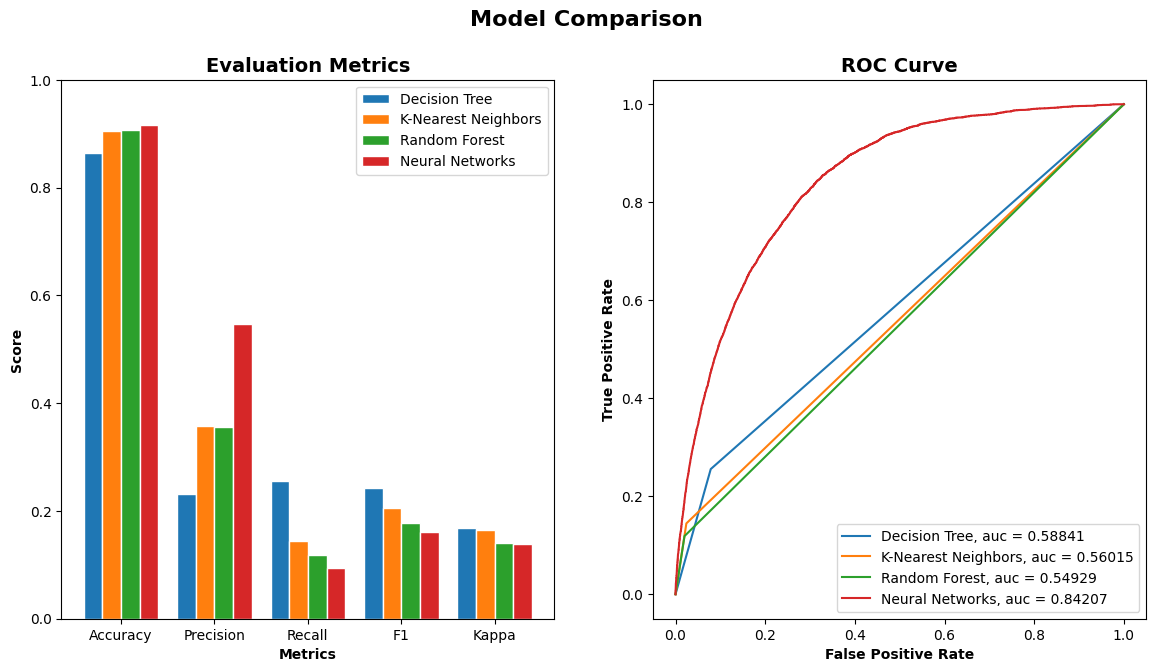

In [23]:
# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.2
clf_score = [clf_eval['acc'], clf_eval['prec'], clf_eval['rec'], clf_eval['f1'], clf_eval['kappa']]
knn_score = [knn_eval['acc'], knn_eval['prec'], knn_eval['rec'], knn_eval['f1'], knn_eval['kappa']]
rf_score = [rf_eval['acc'], rf_eval['prec'], rf_eval['rec'], rf_eval['f1'], rf_eval['kappa']]
nn_score = [nn_eval['acc'], nn_eval['prec'], nn_eval['rec'], nn_eval['f1'], nn_eval['kappa']]

## Set position of bar on X axis
r1 = np.arange(len(clf_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

## Make the plot
ax1.bar(r1, clf_score, width=barWidth, edgecolor='white', label='Decision Tree')
ax1.bar(r2, knn_score, width=barWidth, edgecolor='white', label='K-Nearest Neighbors')
ax1.bar(r3, rf_score, width=barWidth, edgecolor='white', label='Random Forest')
ax1.bar(r4, nn_score, width=barWidth, edgecolor='white', label='Neural Networks')

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(clf_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
## Comparing ROC Curve
ax2.plot(clf_eval['fpr'], clf_eval['tpr'], label='Decision Tree, auc = {:0.5f}'.format(clf_eval['auc']))
ax2.plot(knn_eval['fpr'], knn_eval['tpr'], label='K-Nearest Neighbors, auc = {:0.5f}'.format(knn_eval['auc']))
ax2.plot(rf_eval['fpr'], rf_eval['tpr'], label='Random Forest, auc = {:0.5f}'.format(rf_eval['auc']))
ax2.plot(nn_eval['fpr'], nn_eval['tpr'], label='Neural Networks, auc = {:0.5f}'.format(nn_eval['auc']))

## Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()
